In [1]:
# Importing important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

In [2]:
# Loading the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
# First view of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

# Generate Descriptive Statistics and Visualizations

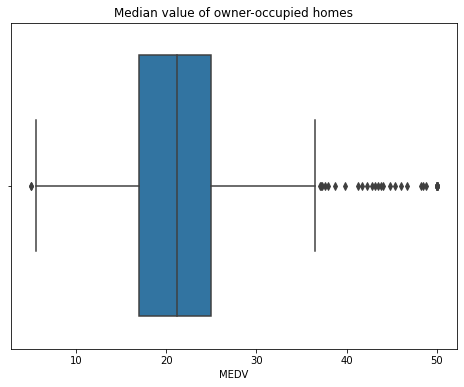

In [5]:
# The "Median value of owner-occupied homes" boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Median value of owner-occupied homes")
plt.show()

The mean Median value is around 22.5 and the third quatile is around 36. The box plot shows a lot of outliers beyond 36.

<AxesSubplot:>

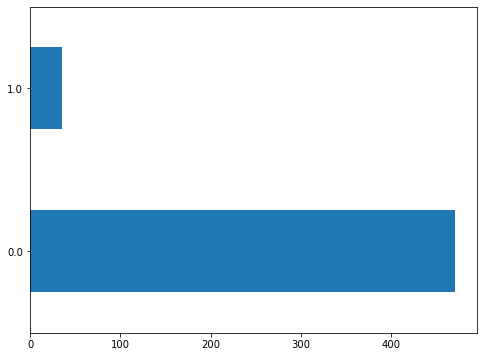

In [6]:
# A bar plot for the Charles river variable
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind ='barh')

majority of our data does not tract bound the Charles river.

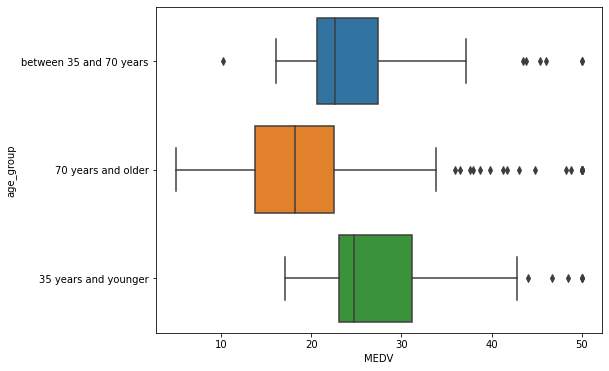

In [7]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
plt.figure(figsize=(8, 6))
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot( y=boston_df["age_group"], x=boston_df["MEDV"] );
plt.show()

people above 70s are shifting to cheaper houses, while the people age 35 or younger are paying the highest median gouse price, 
70 + have the most outliers.

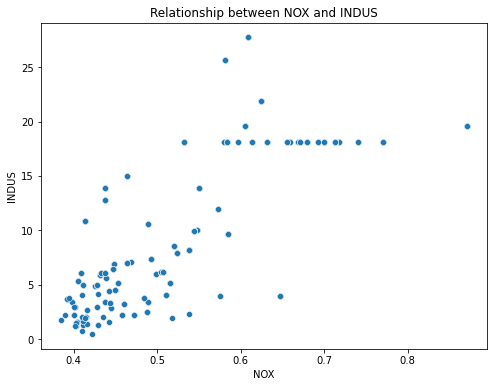

In [8]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

There is a strong positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

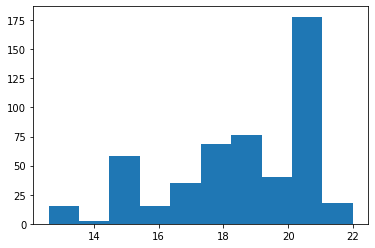

In [9]:
# Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])

The ration data is skwered to the left with a meam arounf 20 to 21.

# Statistics Tests. Use the appropriate tests to answer the questions provided.

In [10]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'],
      dtype='object')

In [11]:
import statsmodels.api as sm

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# HO : There is no difference in median value of houses bounded by charles river
# HA: There is a difference

x = boston_df['CHAS']
y = boston_df['MEDV']
# Adding a intercept 
x= sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#Summary stats
model.summary()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           7.39e-05
Time:                        02:45:54   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

since the p-value is less than our alpha, we have to reject the null hypothesis as there is evidence that there is a difference in mean of median values based on if they are bounded by the Charles river or not

In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#HO: There is no significant difference in MEDV by AGE
#HA: There is significant difference

first = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
second = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
last = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

# Test the hyphotesis
f_stats, p_value = scipy.stats.f_oneway(first,second,last)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


since the p value is less than alpha, we reject the null hypothesis. There is a statistical significant difference between MEDV based on AGE

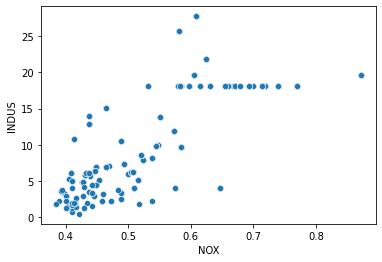

In [14]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# HO : NOX is not correlated with INDUS
# HA: NOX is correlated with  INDUS

ax = sns.scatterplot(x='NOX', y = 'INDUS', data = boston_df)

In [15]:
import scipy.stats
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Since the p value is greater than 0.05, we reject the null hypothesis and conclude that there is an existing relationship between NOX and  INDUS

In [16]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# HO: No impact
# HA: there is an impact

In [17]:
x = boston_df['DIS']
y = boston_df['MEDV']
# Adding a intercept 
x= sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#Summary stats
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        02:45:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Get the Pearson Coefficient value
np.sqrt(0.062) 

0.24899799195977465

There is a weaker corelation between these features.